In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cols_pred = [f"EV_pred_{method_of_lr}" for method_of_lr in ["forest", 'baye', 'lr', 'GraBoost']]
df = pd.read_csv("combine_diff_methods_pred.csv")

In [7]:

print(f"RUNNING")
df = df.sort_values(by=["EV_pred_lr"])
# print(f"WORST")
# print(df.head(10))
print(f"BEST")
print(df.tail(10))

RUNNING
WORST
       hhsize          dwelltype  hhinc  totalvehs         owndwell   hhid  \
13719       2     Separate House  100.0          4  Being Purchased  13719   
14966       1            Missing  100.0          1     Being Rented  14966   
11385       2     Separate House  100.0          1   Something Else  11385   
6013        2     Separate House  100.0          4      Fully Owned   6013   
15796       2  Terrace/Townhouse   75.0          1     Being Rented  15796   
7679        2  Flat or Apartment  100.0          1   Something Else   7679   
278         2     Separate House  100.0          1     Being Rented    278   
5835        2     Separate House  100.0          1     Being Rented   5835   
12888       2     Separate House  100.0          1  Being Purchased  12888   
2777        2     Separate House  100.0          1  Being Purchased   2777   

       EV_pred_forest  EV_pred_baye  EV_pred_lr  EV_pred_GraBoost  
13719        0.004708     -0.005465   -0.071675          0.

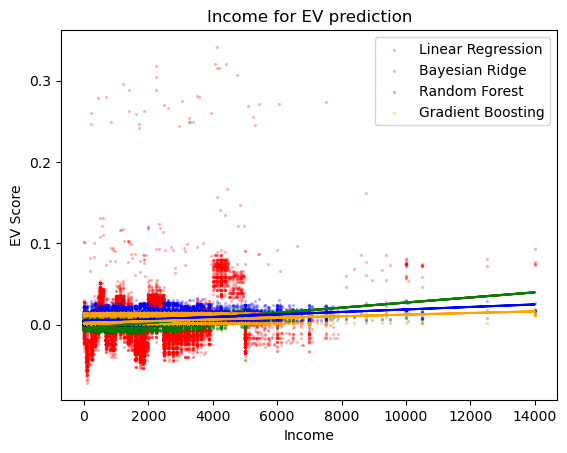

In [100]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df["hhinc"], df["EV_pred_lr"], s=2, c='r', label='Linear Regression', alpha=0.2)
a, b = np.polyfit(df["hhinc"], df["EV_pred_lr"], 1)
plt.plot(df["hhinc"], a*df["hhinc"]+b,  c='r')

ax1.scatter(df["hhinc"], df["EV_pred_baye"], s=2, c='g', label='Bayesian Ridge', alpha=0.2)
a, b = np.polyfit(df["hhinc"], df["EV_pred_lr"], 1)
plt.plot(df["hhinc"], a*df["hhinc"]+b, c='g')

ax1.scatter(df["hhinc"], df["EV_pred_forest"], s=2, c='b', label='Random Forest', alpha=0.2)
a, b = np.polyfit(df["hhinc"], df["EV_pred_forest"], 1)
plt.plot(df["hhinc"], a*df["hhinc"]+b, c='b')

ax1.scatter(df["hhinc"], df["EV_pred_GraBoost"], s=2, c='orange', label='Gradient Boosting', alpha=0.3)
a, b = np.polyfit(df["hhinc"], df["EV_pred_GraBoost"], 1)
plt.plot(df["hhinc"], a*df["hhinc"]+b, c='orange')
plt.xlabel("Income")
plt.ylabel("EV Score")
plt.title("Income for EV prediction")
plt.legend(loc='upper right')

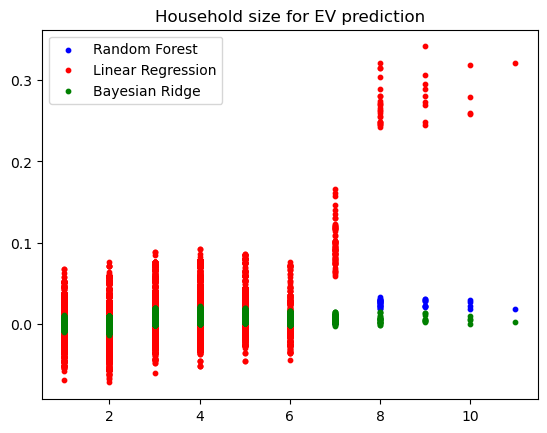

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df["hhsize"], df["EV_pred_forest"], s=10, c='b', label='Random Forest')
ax1.scatter(df["hhsize"], df["EV_pred_lr"], s=10, c='r', label='Linear Regression')
ax1.scatter(df["hhsize"], df["EV_pred_baye"], s=10, c='g', label='Bayesian Ridge')
plt.title("Household size for EV prediction")
plt.legend(loc='upper left')

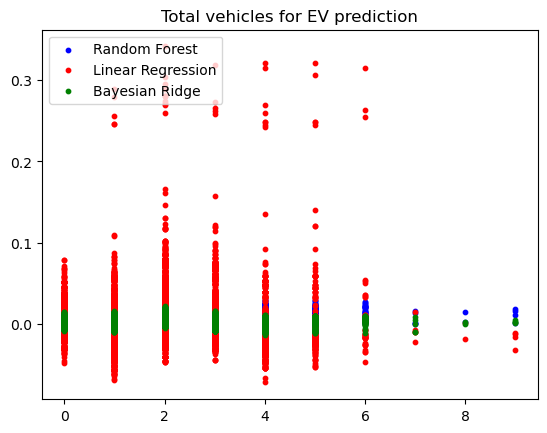

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df["totalvehs"], df["EV_pred_forest"], s=10, c='b', label='Random Forest')
ax1.scatter(df["totalvehs"], df["EV_pred_lr"], s=10, c='r', label='Linear Regression')
ax1.scatter(df["totalvehs"], df["EV_pred_baye"], s=10, c='g', label='Bayesian Ridge')
plt.title("Total vehicles for EV prediction")
plt.legend(loc='upper left')

(array([0.2, 1.2, 2.2, 3.2, 4.2]),
 [Text(0.2, 0, 'Flat or Apartment'),
  Text(1.2, 0, 'Missing'),
  Text(2.2, 0, 'Other'),
  Text(3.2, 0, 'Separate House'),
  Text(4.2, 0, 'Terrace/Townhouse')])

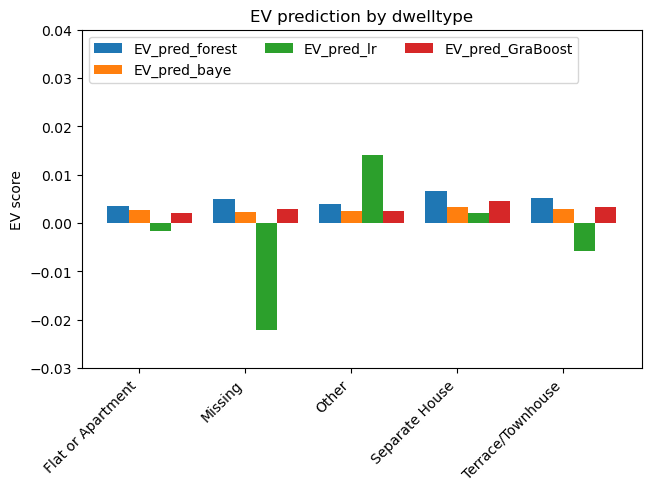

In [90]:
att = "dwelltype"
df_new_new = df[cols_pred + [att]]
df_new_new = df_new_new.groupby(att).mean().transpose()

fig, ax = plt.subplots(layout='constrained')

cols = df_new_new.columns

x = np.arange(len(cols))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

dict_hold = df_new_new.to_dict("index")
dict_hold_2 = {key: tuple(val_d.values()) for key, val_d in dict_hold.items()}

for att_state, mean_val in dict_hold_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, mean_val, width, label=att_state)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EV score')
ax.set_title(f"EV prediction by {att}")
ax.set_xticks(x + width, cols)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.03, 0.04)
plt.xticks(rotation=45, ha='right')

(array([0.22, 1.22, 2.22, 3.22, 4.22]),
 [Text(0.22, 0, 'Being Purchased'),
  Text(1.22, 0, 'Being Rented'),
  Text(2.22, 0, 'Fully Owned'),
  Text(3.22, 0, 'Occupied Rent-Free'),
  Text(4.22, 0, 'Something Else')])

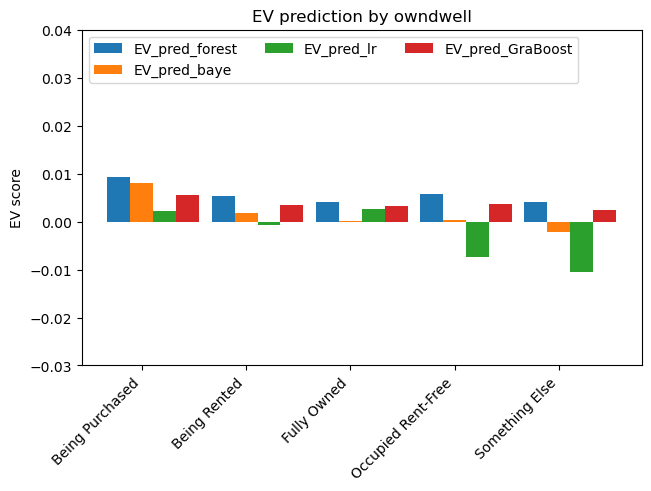

In [91]:
att = "owndwell"
df_new_new = df[cols_pred + [att]]
df_new_new = df_new_new.groupby(att).mean().transpose()

fig, ax = plt.subplots(layout='constrained')

cols = df_new_new.columns

x = np.arange(len(cols))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

dict_hold = df_new_new.to_dict("index")
dict_hold_2 = {key: tuple(val_d.values()) for key, val_d in dict_hold.items()}

for att_state, mean_val in dict_hold_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, mean_val, width, label=att_state)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EV score')
ax.set_title(f"EV prediction by {att}")
ax.set_xticks(x + width, cols)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.03, 0.04)
plt.xticks(rotation=45, ha='right')

(-0.03, 0.4)

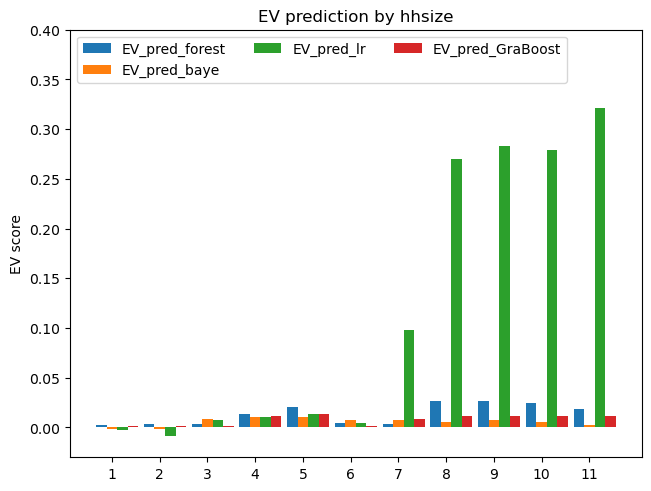

In [92]:
att = "hhsize"
df_new_new = df[cols_pred + [att]]
df_new_new = df_new_new.groupby(att).mean().transpose()

fig, ax = plt.subplots(layout='constrained')

cols = df_new_new.columns

x = np.arange(len(cols))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0

dict_hold = df_new_new.to_dict("index")
dict_hold_2 = {key: tuple(val_d.values()) for key, val_d in dict_hold.items()}

for att_state, mean_val in dict_hold_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, mean_val, width, label=att_state)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EV score')
ax.set_title(f"EV prediction by {att}")
ax.set_xticks(x + width, cols)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.03, 0.4)

(-0.03, 0.04)

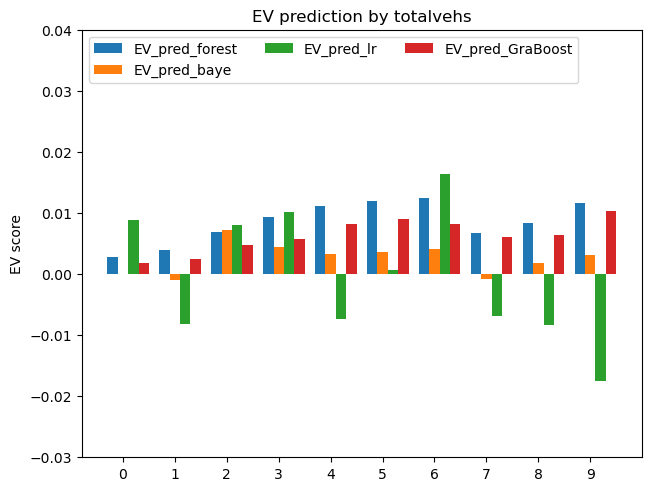

In [93]:
att = "totalvehs"
df_new_new = df[cols_pred + [att]]
df_new_new = df_new_new.groupby(att).mean().transpose()

fig, ax = plt.subplots(layout='constrained')

cols = df_new_new.columns

x = np.arange(len(cols))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

dict_hold = df_new_new.to_dict("index")
dict_hold_2 = {key: tuple(val_d.values()) for key, val_d in dict_hold.items()}

for att_state, mean_val in dict_hold_2.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, mean_val, width, label=att_state)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EV score')
ax.set_title(f"EV prediction by {att}")
ax.set_xticks(x + width, cols)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(-0.03, 0.04)